In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'House prices')

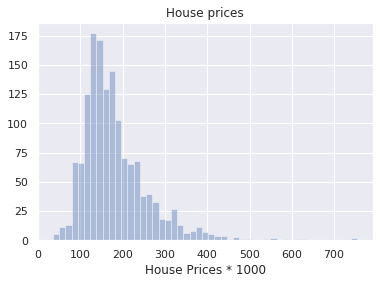

In [4]:
house_prices = train_data['SalePrice']
ax = sns.distplot(house_prices / 1000, kde=False)
ax.set_xlabel('House Prices * 1000')
ax.set_title('House prices')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
def plot_classify_feature(feature):
    facet = sns.FacetGrid(train_data, hue=feature,aspect=4)
    facet.map(sns.distplot,'SalePrice', kde=False)
    facet.add_legend()
 
    plt.show()

In [7]:
def plot_number_feature(feature):
    sns.regplot(x=feature, y = 'SalePrice', data=train_data)

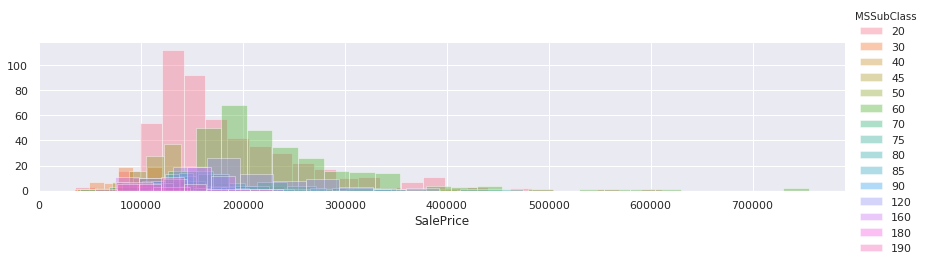

In [8]:
plot_classify_feature('MSSubClass')

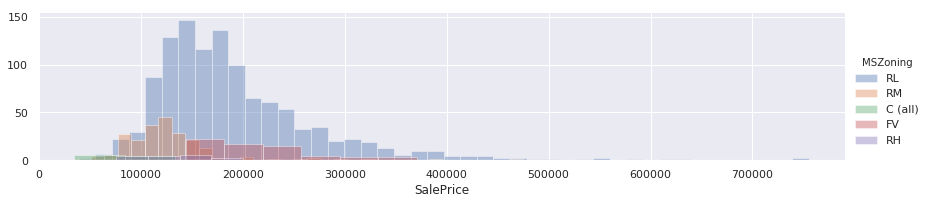

In [9]:
plot_classify_feature('MSZoning')

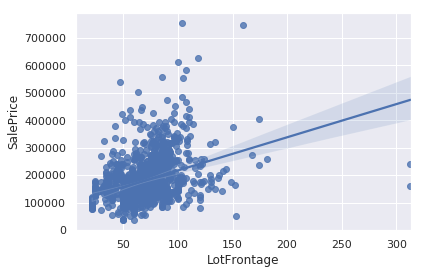

In [10]:
plot_number_feature('LotFrontage')

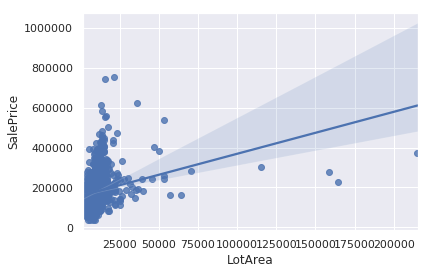

In [11]:
plot_number_feature('LotArea')

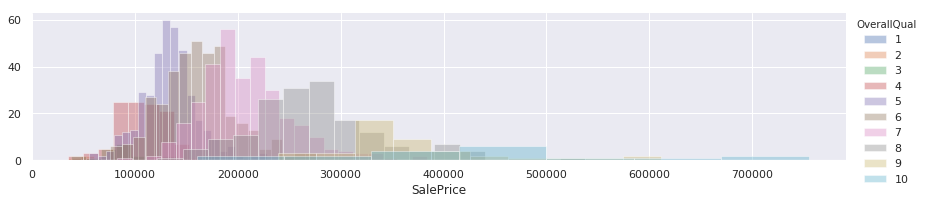

In [12]:
plot_classify_feature('OverallQual')

In [13]:
# train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

In [14]:
# #MSSubClass=The building class
# train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)

# test_data['MSSubClass'] = test_data['MSSubClass'].apply(str)


# #Changing OverallCond into a categorical variable
# train_data['OverallCond'] = train_data['OverallCond'].astype(str)
# train_data['OverallQual'] = train_data['OverallQual'].astype(str)

# test_data['OverallCond'] = test_data['OverallCond'].astype(str)
# test_data['OverallQual'] = test_data['OverallQual'].astype(str)


# #Year and month sold are transformed into categorical features.
# train_data['YrSold'] = train_data['YrSold'].astype(str)
# train_data['MoSold'] = train_data['MoSold'].astype(str)

# test_data['YrSold'] = test_data['YrSold'].astype(str)
# test_data['MoSold'] = test_data['MoSold'].astype(str)

In [15]:
# from scipy.stats import skew

# for feature in train_data.columns.values:
#     if train_data[feature].dtype == 'object':
#         train_data[feature].fillna('UNKNOWN', inplace=True)
#     else:
#         train_data[feature].fillna(train_data[feature].median(), inplace=True)
# #         if abs(skew(train_data[feature])) > 0.5:
# #             train_data[feature] = np.log1p(train_data[feature])
        
# for feature in test_data.columns.values:
#     if test_data[feature].dtype == 'object':
#         test_data[feature].fillna('UNKNOWN', inplace=True)
#     else:
#         test_data[feature].fillna(test_data[feature].median(), inplace=True)
# #         if abs(skew(test_data[feature])) > 0.5:
# #             test_data[feature] = np.log1p(test_data[feature])

In [16]:
alldata = pd.concat([train_data.drop('SalePrice', axis=1), test_data])
alldata = alldata.drop('Id', axis=1)

In [17]:
alldata['MSSubClass'] = alldata['MSSubClass'].apply(str)

In [18]:
alldata = pd.get_dummies(alldata, dummy_na=True)

In [19]:
alldata = alldata.fillna(alldata.median())

In [20]:
alldata.isnull().values.any()

False

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
alldata = pd.DataFrame(scaler.fit_transform(alldata), columns = alldata.columns)

alldata.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
alldata.shape

(2919, 347)

In [23]:
y = train_data['SalePrice']

X = alldata[:len(train_data)]
X_test = alldata[len(train_data):]

In [24]:
# for feature in X.columns.values:
#     if feature not in X_test:
#         X_test[feature] = 0
        
# for feature in X_test.columns.values:
#     if feature not in X:
#         X[feature] = 0

In [25]:
# min_value = X.min()
# max_value = X.max()

# min_max_equal = min_value == max_value

In [26]:
# for feature in min_max_equal.index:
#     if not min_max_equal[feature]:
#         X[feature] = (X[feature] - min_value[feature]) / (max_value[feature] - min_value[feature])
#         X_test[feature] = (X_test[feature] - min_value[feature]) / (max_value[feature] - min_value[feature])

In [27]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

In [28]:
# important_features = []
# not_important_features = []

# # Print the name and gini importance of each feature
# for feature in zip(X.columns.values, model.feature_importances_):
#     if feature[1] > 0.01:
#         important_features.append(feature)
#     else:
#         not_important_features.append(feature)

In [29]:
# X = X[[important_feature[0] for important_feature in important_features]]
# X_test = X_test[[important_feature[0] for important_feature in important_features]]

In [30]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': np.floor(np.expm1(predictions / 1000))})
# output.to_csv('random_forest.csv', index=False)

In [31]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
import numpy as np
import sys

In [32]:
##########################
### SETTINGS
##########################

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Hyperparameters
random_seed = 0
learning_rate = 0.01
num_epochs = 1428
batch_size = 30
print(batch_size)

# Architecture
num_features = len(X.columns.values)
print(len(X.columns.values))

cuda:0
30
347


In [33]:
X = torch.tensor(X.values)
y = torch.tensor(y.values).view(-1, 1)

train_loader = DataLoader(dataset=list(zip(X, y)),
                          batch_size=batch_size,
                          shuffle=True)

In [34]:
X_test = torch.tensor(X_test.values)

In [35]:
##########################
### MODEL
##########################

class HousePricingModel(torch.nn.Module):
    def __init__(self, num_features):
        super(HousePricingModel, self).__init__()
        self.fc1 = torch.nn.Linear(num_features, 144)
        self.fc2 = torch.nn.Linear(144, 72)
        self.fc3 = torch.nn.Linear(72, 18)
        self.fc4 = torch.nn.Linear(18, 1)
        
        self.bn1 = torch.nn.BatchNorm1d(144)
        self.bn2 = torch.nn.BatchNorm1d(72)
        self.bn3 = torch.nn.BatchNorm1d(18)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = F.relu(self.fc3(x))
        x = self.bn3(x)
        x = F.relu(self.fc4(x)) + sys.float_info.epsilon

        return x

model = HousePricingModel(num_features=num_features)

model.to(device)

HousePricingModel(
  (fc1): Linear(in_features=347, out_features=144, bias=True)
  (fc2): Linear(in_features=144, out_features=72, bias=True)
  (fc3): Linear(in_features=72, out_features=18, bias=True)
  (fc4): Linear(in_features=18, out_features=1, bias=True)
  (bn1): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [36]:
##########################
### COST AND OPTIMIZER
##########################

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [37]:
lowest_cost = 100
lowest_cost_epoch = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    batch_number = 0
    for batch_idx, (features, targets) in enumerate(train_loader):        
        ### FORWARD AND BACK PROP
        logits = model(features.float().to(device))

        cost = torch.sqrt(criterion(torch.log(logits), torch.log(targets.float().to(device))))
        optimizer.zero_grad()
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        train_loss += cost.item()
        batch_number += 1        
    else:
        print ('Epoch: %03d/%03d | Cost: %.4f' %(epoch+1, num_epochs, train_loss/batch_number))    
        lowest_cost, lowest_cost_epoch = (train_loss/batch_number, epoch) if lowest_cost > train_loss/batch_number else (lowest_cost, lowest_cost_epoch)


print(f'lowest cost epoch is {lowest_cost_epoch} with cost of {lowest_cost}')

Epoch: 001/1428 | Cost: 21.1969
Epoch: 002/1428 | Cost: 16.5045
Epoch: 003/1428 | Cost: 14.4933
Epoch: 004/1428 | Cost: 10.9683
Epoch: 005/1428 | Cost: 8.7960
Epoch: 006/1428 | Cost: 8.3910
Epoch: 007/1428 | Cost: 8.0868
Epoch: 008/1428 | Cost: 7.8409
Epoch: 009/1428 | Cost: 7.6310
Epoch: 010/1428 | Cost: 7.4484
Epoch: 011/1428 | Cost: 7.2848
Epoch: 012/1428 | Cost: 7.1379
Epoch: 013/1428 | Cost: 7.0056
Epoch: 014/1428 | Cost: 6.8824
Epoch: 015/1428 | Cost: 6.7679
Epoch: 016/1428 | Cost: 6.6603
Epoch: 017/1428 | Cost: 6.5599
Epoch: 018/1428 | Cost: 6.4663
Epoch: 019/1428 | Cost: 6.3771
Epoch: 020/1428 | Cost: 6.2911
Epoch: 021/1428 | Cost: 6.2103
Epoch: 022/1428 | Cost: 6.1340
Epoch: 023/1428 | Cost: 6.0592
Epoch: 024/1428 | Cost: 5.9899
Epoch: 025/1428 | Cost: 5.9209
Epoch: 026/1428 | Cost: 5.8551
Epoch: 027/1428 | Cost: 5.7925
Epoch: 028/1428 | Cost: 5.7307
Epoch: 029/1428 | Cost: 5.6720
Epoch: 030/1428 | Cost: 5.6144
Epoch: 031/1428 | Cost: 5.5587
Epoch: 032/1428 | Cost: 5.5030
Epoc

In [38]:
 predictions = model.forward(X_test.float().to(device))

In [39]:
predictions = [element.item() for element in predictions.flatten()]

In [40]:
output = pd.DataFrame({'Id': test_data.Id.tolist(), 'SalePrice': predictions})
output.to_csv('deep_learning.csv', index=False)

In [41]:
output.head()

,Id,SalePrice
0,1461,130782.765625
1,1462,151203.890625
2,1463,190017.781250
3,1464,183254.750000
4,1465,180294.093750
